# Collective Dynamics as function of frequency

In this notebook I will run the dimer system with different frequencies. I will keep the rest of the parameters constant, although I will try several configurations. Instead of animating the results, I will plot the statistics of the dimers, which will be faster, and will not produce such a heavy notebook. In the end, I might show some representative results as animations. 

In [1]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.collections as clt
import pandas as pd
import string as st
import scipy.spatial as spp
import scipy.optimize as spo
import sympy as smp
import copy as cp
import pickle

from IPython.display import HTML

smp.init_printing()
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Points in phase space.

These are the points that I will run the simulation for.

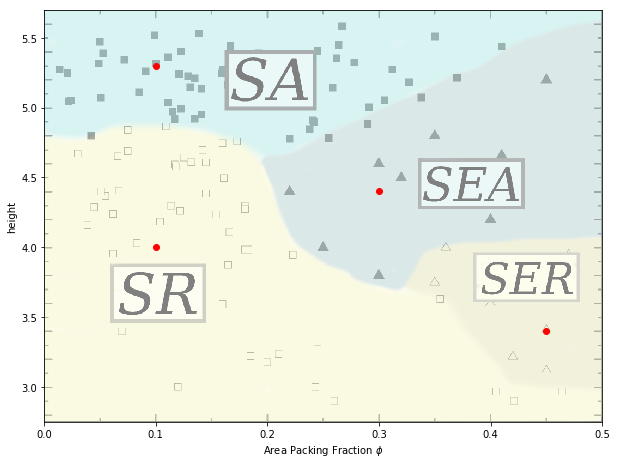

In [2]:
packing = [0.1,0.1,0.3,0.45]

height = [4,5.3,4.4,3.4]
ax = lmp.draw_exp_phase_diagram()
ax.plot(packing,height,marker='o',color='r',linestyle='none')

In [3]:
Sampling = 25

# Point 1 - Synch/Rupture

In [4]:
Setup = 1
idx = pd.IndexSlice
radius = 1.4 #um
frequency = np.linspace(np.sqrt(0.1),np.sqrt(20),Sampling)**2 #Hz
angle = 27 #degrees

region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=packing[0], height = height[0])
median_dimer_lifetime = np.empty(np.shape(frequency))

simulations_0 = []

for i,f in enumerate(frequency):

    if i>0:
        last_frame = trj.index.get_level_values('frame').unique()[-1]
        initial_positions = trj.loc[idx[last_frame,:]].filter(["x","y","z"]).values

    sim = lmp.sim(initial_positions,
              magnitude = 7.28,
              file_name = "collective_dimer_vs_frequency_f_%g"%f,
              dir_name = "C:/Users/aortiza/Desktop/CollectiveSystemResponse/Setup_0",
              radius = radius,
              diffusion = 0.073,
              frequency=f,
              susceptibility = 0.4,
              angle=angle,
              framerate=1e1,
              timestep=1e-4,
              total_time = 30,
              temperature = 300,
              stamp_time = False,
              space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

    sim.generate_scripts()
    sim.run()
    simulations_0.append(sim)
    
    trj = sim.load(read_trj = True)
    dim = lmp.dimers(trj,sim,distance=3)
    
    if dim.empty:
        median_dimer_lifetime[i] = 0
    else: 
        median_dimer_lifetime[i] = dim.groupby('id').size().median()/sim.run_parameters.framerate

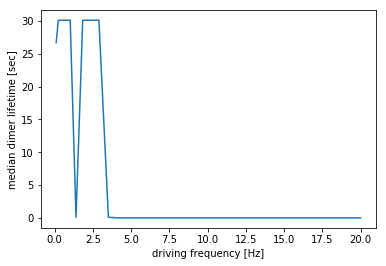

In [5]:
plt.plot(frequency,median_dimer_lifetime)
plt.xlabel("driving frequency [Hz]")
plt.ylabel("median dimer lifetime [sec]")

In [48]:
frequency_0 = np.linspace(np.sqrt(0.1),np.sqrt(20),Sampling)**2 #Hz

In [57]:
f_ind = 5
print(frequency_0[f_ind])
trj = simulations_0[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_0[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_0[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

1.3972232237


# Point 2 - Synch/Asynch

In [6]:
Setup = 1
idx = pd.IndexSlice
radius = 1.4 #um
frequency = np.linspace(np.sqrt(0.1),np.sqrt(100),Sampling)**2 #Hz
angle = 27 #degrees

region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=packing[Setup], height = height[Setup])
median_dimer_lifetime = np.empty(np.shape(frequency))

simulations_1 = []

for i,f in enumerate(frequency):

    if i>0:
        last_frame = trj.index.get_level_values('frame').unique()[-1]
        initial_positions = trj.loc[idx[last_frame,:]].filter(["x","y","z"]).values

    sim = lmp.sim(initial_positions,
              magnitude = 7.28,
              file_name = "collective_dimer_vs_frequency_f_%g"%f,
              dir_name = "C:/Users/aortiza/Desktop/CollectiveSystemResponse/Setup_1",
              radius = radius,
              diffusion = 0.073,
              frequency=f,
              susceptibility = 0.4,
              angle=angle,
              framerate=1e1,
              timestep=1e-4,
              total_time = 30,
              temperature = 300,
              stamp_time = False,
              space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

    sim.generate_scripts()
    sim.run()
    simulations_1.append(sim)
    
    trj = sim.load(read_trj = True)
    dim = lmp.dimers(trj,sim,distance=3)
    
    if dim.empty:
        median_dimer_lifetime[i] = 0
    else: 
        median_dimer_lifetime[i] = dim.groupby('id').size().median()/sim.run_parameters.framerate

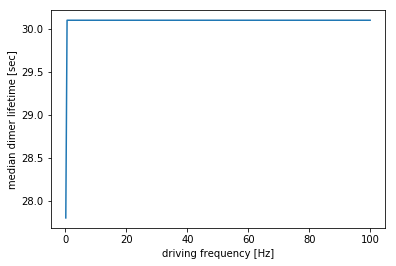

In [7]:
plt.plot(frequency,median_dimer_lifetime)
plt.xlabel("driving frequency [Hz]")
plt.ylabel("median dimer lifetime [sec]")

# Point 3 - Synch/Exch/Asynch

In [8]:
Setup = 2
idx = pd.IndexSlice
radius = 1.4 #um
frequency = np.linspace(np.sqrt(0.1),np.sqrt(100),Sampling)**2 #Hz
angle = 27 #degrees

region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=packing[Setup], height = height[Setup])
median_dimer_lifetime = np.empty(np.shape(frequency))

simulations_2 = []

for i,f in enumerate(frequency):

    if i>0:
        last_frame = trj.index.get_level_values('frame').unique()[-1]
        initial_positions = trj.loc[idx[last_frame,:]].filter(["x","y","z"]).values

    sim = lmp.sim(initial_positions,
              magnitude = 7.28,
              file_name = "collective_dimer_vs_frequency_f_%g"%f,
              dir_name = "C:/Users/aortiza/Desktop/CollectiveSystemResponse/Setup_%u"%Setup,
              radius = radius,
              diffusion = 0.073,
              frequency=f,
              susceptibility = 0.4,
              angle=angle,
              framerate=1e1,
              timestep=1e-4,
              total_time = 30,
              temperature = 300,
              stamp_time = False,
              space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

    sim.generate_scripts()
    sim.run()
    simulations_2.append(sim)
    
    trj = sim.load(read_trj = True)
    dim = lmp.dimers(trj,sim,distance=3.5)
    
    if dim.empty:
        median_dimer_lifetime[i] = 0
    else: 
        median_dimer_lifetime[i] = dim.groupby('id').size().median()/sim.run_parameters.framerate

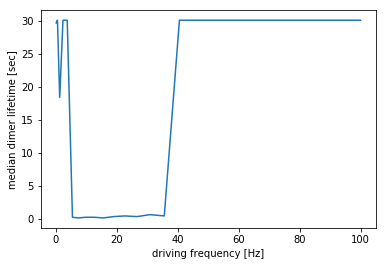

In [9]:
plt.plot(frequency,median_dimer_lifetime)
plt.xlabel("driving frequency [Hz]")
plt.ylabel("median dimer lifetime [sec]")

In [40]:
f_ind = 4
trj = simulations_2[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_2[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_2[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

In [41]:
f_ind = 8
trj = simulations_2[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_2[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_2[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

In [42]:
f_ind = -1
trj = simulations_2[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_2[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_2[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

# Point 4 - Synch/Exch/Rupture

In [12]:
Setup = 3
idx = pd.IndexSlice
radius = 1.4 #um
frequency = np.linspace(np.sqrt(0.1),np.sqrt(100),Sampling)**2 #Hz
angle = 27 #degrees

region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=packing[Setup], height = height[Setup])
median_dimer_lifetime = np.empty(np.shape(frequency))

simulations_3 = []

for i,f in enumerate(frequency):

    if i>0:
        last_frame = trj.index.get_level_values('frame').unique()[-1]
        initial_positions = trj.loc[idx[last_frame,:]].filter(["x","y","z"]).values

    sim = lmp.sim(initial_positions,
              magnitude = 7.28,
              file_name = "collective_dimer_vs_frequency_f_%g"%f,
              dir_name = "C:/Users/aortiza/Desktop/CollectiveSystemResponse/Setup_%u"%Setup,
              radius = radius,
              diffusion = 0.073,
              frequency=f,
              susceptibility = 0.4,
              angle=angle,
              framerate=1e1,
              timestep=1e-4,
              total_time = 30,
              temperature = 300,
              stamp_time = False,
              space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

    sim.generate_scripts()
    sim.run()
    simulations_3.append(sim)
    
    trj = sim.load(read_trj = True)
    dim = lmp.dimers(trj,sim,distance=3.5)
    
    if dim.empty:
        median_dimer_lifetime[i] = 0
    else: 
        median_dimer_lifetime[i] = dim.groupby('id').size().median()/sim.run_parameters.framerate

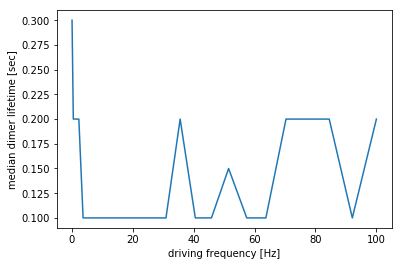

In [13]:
plt.plot(frequency,median_dimer_lifetime)
plt.xlabel("driving frequency [Hz]")
plt.ylabel("median dimer lifetime [sec]")

In [43]:
f_ind = 0
trj = simulations_3[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_3[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_3[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

In [44]:
f_ind = 3
trj = simulations_3[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_3[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_3[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

In [46]:
f_ind = -1
trj = simulations_3[f_ind].load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = 5/simulations_3[f_ind].run_parameters.timestep
HTML(lmp.display_animation_direct(simulations_3[f_ind],trj.loc[idx[frames[frames<frame_limit],:]]))

### Hypothesis:

The time it takes to form a dimer structure depends on the initial conditions, and on the frequency. If we start from low frequency and increase it, we reach a state of dimers faster than if we start in a high energy configuration. 

It could also be true that the exchange phase has a direction which is determined by the position in which the exchange phase is entered. Starting from a symmetric ordered configuration, the exchange phase has no nematic order. 

In other words: memory could be more important than we think. 